In [8]:
# 읽어오고자 하는 텍스트 파일을 지정
text = ''
filePath = '../../data/Score_1_Review.txt'
with open(filePath, "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        text += line

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
from collections import Counter
import re
import pandas as pd
import numpy as np

In [10]:
# 불용어 사전 - 수정 및 보완 예정
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

In [11]:
# 데이터 전처리 함수 - 수정 및 보완 예정
def text_preprocessed(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
    result = hangul.sub('', text)
    tagger = Okt()
    nouns = tagger.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]
    nouns = [x for x in nouns if x not in stopwords]
    return nouns

In [13]:
vect = CountVectorizer(tokenizer = lambda x : text_preprocessed(x))
bow_vect = vect.fit_transform([text])
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

c:\Users\taeri\miniconda3\envs\ds_study\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
word_count_dict = dict(zip(word_list, count_list))

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 599.5, 399.5, -0.5)

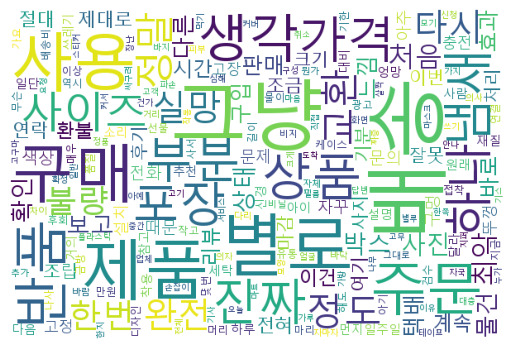

In [16]:
wc = word_count_dict

wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 600, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc) # 워드 클라우드 빈도수 지정

plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')